# **Final Project**

In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load

"""
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.text import Tokenizer #for text tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense#Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
"""

#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from tqdm.notebook import tqdm as Tqdm #to check loop progress
Tqdm().pandas()
import torch

#from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Now import the packagea
from torch_snippets import *
print("Torch Snippets Imported Successfully!")

0it [00:00, ?it/s]

cuda
Torch Snippets Imported Successfully!


# Open Images

In [2]:
"""
from tqdm.notebook import tqdm  # Explicit import for notebook-friendly Tqdm
import json
import numpy as np
import pandas as pd

with open('open_images_train_v6_captions.jsonl', 'r') as json_file:
    json_list = json_file.read().split('\n')

np.random.shuffle(json_list)

data = []
N = 100000

# Use tqdm correctly with enumerate
for ix, json_str in tqdm(enumerate(json_list), total=N, desc="Processing JSONs"):
    if ix == N:
        break
    try:
        result = json.loads(json_str)
        x = pd.DataFrame.from_dict(result, orient='index').T
        data.append(x)
    except json.JSONDecodeError:
        pass  # Handle invalid JSON gracefully
"""

'\nfrom tqdm.notebook import tqdm  # Explicit import for notebook-friendly Tqdm\nimport json\nimport numpy as np\nimport pandas as pd\n\nwith open(\'open_images_train_v6_captions.jsonl\', \'r\') as json_file:\n    json_list = json_file.read().split(\'\n\')\n\nnp.random.shuffle(json_list)\n\ndata = []\nN = 100000\n\n# Use tqdm correctly with enumerate\nfor ix, json_str in tqdm(enumerate(json_list), total=N, desc="Processing JSONs"):\n    if ix == N:\n        break\n    try:\n        result = json.loads(json_str)\n        x = pd.DataFrame.from_dict(result, orient=\'index\').T\n        data.append(x)\n    except json.JSONDecodeError:\n        pass  # Handle invalid JSON gracefully\n'

In [3]:
"""
np.random.seed(10)
data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data), p=[0.95,0.05])
data.head()
data.to_csv('data.csv', index=False)
"""

"\nnp.random.seed(10)\ndata = pd.concat(data)\ndata['train'] = np.random.choice([True,False], size=len(data), p=[0.95,0.05])\ndata.head()\ndata.to_csv('data.csv', index=False)\n"

# Flickr8k

In [4]:
"""
import pandas as pd

# Specify the delimiter as '\t' and name the columns appropriately
data = pd.read_csv("./Anotation/Flickr8k.token.txt", sep='\t', names=['image_caption', 'caption'])

# Split 'image_caption' into 'image' and 'caption_id'
data[['image', 'caption_id']] = data['image_caption'].str.split('#', expand=True)

# Drop the intermediate 'image_caption' column
data = data.drop(columns=['image_caption'])

# Preview the processed DataFrame
print(data.head())

#from datasets import load_dataset

#ds = load_dataset("nlphuji/flickr30k")
"""

'\nimport pandas as pd\n\n# Specify the delimiter as \'\t\' and name the columns appropriately\ndata = pd.read_csv("./Anotation/Flickr8k.token.txt", sep=\'\t\', names=[\'image_caption\', \'caption\'])\n\n# Split \'image_caption\' into \'image\' and \'caption_id\'\ndata[[\'image\', \'caption_id\']] = data[\'image_caption\'].str.split(\'#\', expand=True)\n\n# Drop the intermediate \'image_caption\' column\ndata = data.drop(columns=[\'image_caption\'])\n\n# Preview the processed DataFrame\nprint(data.head())\n\n#from datasets import load_dataset\n\n#ds = load_dataset("nlphuji/flickr30k")\n'

In [5]:
'''
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from textwrap import wrap

def readImage(path, img_size=224):
    """
    Reads an image and processes it for PyTorch models.
    
    Parameters:
    - path: str, path to the image file
    - img_size: int, size to resize the image to (img_size x img_size)
    
    Returns:
    - Tensor: Processed image tensor
    """
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),  # Converts image to [0, 1] range and changes to (C, H, W)
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained models
    ])
    img = Image.open(path).convert("RGB")  # Ensure RGB mode
    img = transform(img)
    return img.permute(1, 2, 0).numpy()  # Convert back to (H, W, C) for visualization

def display_images(temp_df):
    """
    Displays a set of images with captions from a DataFrame.
    
    Parameters:
    - temp_df: DataFrame, contains 'image' (file name) and 'caption' columns
    """
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize=(20, 20))
    n = 0
    for i in range(15):
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        image = readImage(f"./Flicker8k_Dataset/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")
    plt.show()
'''

'\nimport torch\nfrom torchvision import transforms\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nfrom textwrap import wrap\n\ndef readImage(path, img_size=224):\n    """\n    Reads an image and processes it for PyTorch models.\n    \n    Parameters:\n    - path: str, path to the image file\n    - img_size: int, size to resize the image to (img_size x img_size)\n    \n    Returns:\n    - Tensor: Processed image tensor\n    """\n    transform = transforms.Compose([\n        transforms.Resize((img_size, img_size)),\n        transforms.ToTensor(),  # Converts image to [0, 1] range and changes to (C, H, W)\n        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained models\n    ])\n    img = Image.open(path).convert("RGB")  # Ensure RGB mode\n    img = transform(img)\n    return img.permute(1, 2, 0).numpy()  # Convert back to (H, W, C) for visualization\n\ndef display_images(temp_df):\n    """\n    Displays a set of images wit

In [6]:
#display_images(data.sample(15))

# Flickr30k

In [7]:
from datasets import load_dataset

dataset_flickr30k = load_dataset("nlphuji/flickr30k")

In [8]:
dataset_flickr30k

DatasetDict({
    test: Dataset({
        features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
        num_rows: 31014
    })
})

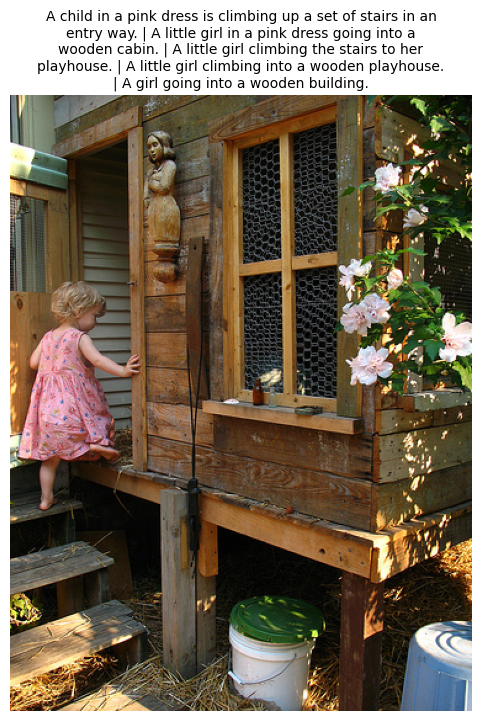

In [9]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Select a sample from the dataset
sample = dataset_flickr30k['test'][2]
image = sample['image']
captions = sample['caption']

# Display the image with the captions
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.title("\n".join(wrap(" | ".join(captions), 60)), fontsize=10)
plt.show()

In [10]:
# Split the dataset into train and test sets
train_test_split = dataset_flickr30k['test'].train_test_split(test_size=0.2)

# Further split the train set into train and validation sets
train_val_split = train_test_split['train'].train_test_split(test_size=0.2)

# Combine splits into a dictionary
dataset_flickr30k = {
    'train': train_val_split['train'],
    'validation': train_val_split['test'],
    'test': train_test_split['test']
}

del train_test_split, train_val_split

dataset_flickr30k

{'train': Dataset({
     features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
     num_rows: 19848
 }),
 'validation': Dataset({
     features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
     num_rows: 4963
 }),
 'test': Dataset({
     features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
     num_rows: 6203
 })}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.535425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4308496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping in

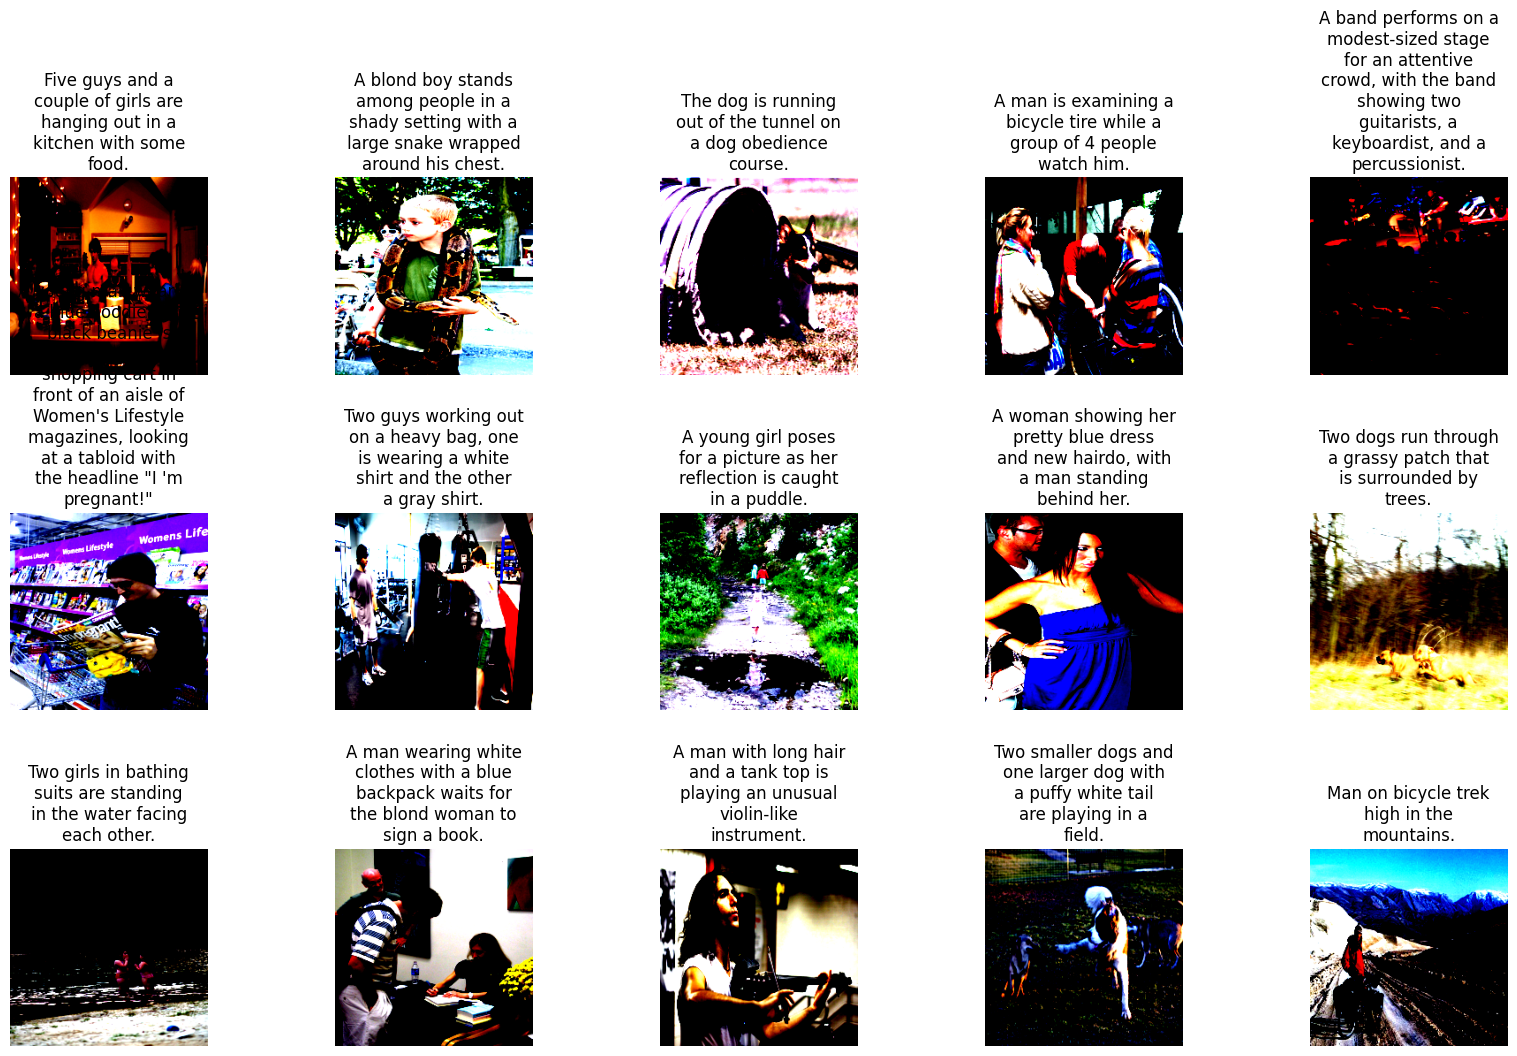

In [11]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from textwrap import wrap
from datasets import load_dataset


# Function to read and process an image
def read_image(img_pil, img_size=224):
    """
    Reads and processes a PIL image for PyTorch models.
    Parameters:
    - img_pil: PIL Image object
    - img_size: int, size to resize the image to (img_size x img_size)
    Returns:
    - numpy array: Processed image ready for display
    """
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),  # Converts image to [0, 1] range
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained models
    ])
    img = transform(img_pil)
    return img.permute(1, 2, 0).numpy()  # Convert back to (H, W, C) for visualization

# Function to display a sample of images with captions
def display_images(dataset, split='train'):
    """
    Displays images and captions from a dataset split.
    Parameters:
    - dataset: dict, containing 'train', 'validation', 'test' splits
    - split: str, which dataset split to display ('train', 'validation', 'test')
    """
    subset = dataset[split]
    subset = subset.select(range(min(15, len(subset))))  # Select the first 15 samples
    plt.figure(figsize=(20, 20))
    
    for idx, data in enumerate(subset):
        plt.subplot(5, 5, idx + 1)
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        
        # Process image
        image = read_image(data['image'])
        
        # Plot image
        plt.imshow(image)
        plt.title("\n".join(wrap(data['caption'][0], 20)))  # Show the first caption
        plt.axis("off")
    plt.show()

# Display images from the training set
display_images(dataset_flickr30k, split='train')


In [12]:
dataset_flickr30k['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>,
 'caption': ['Five guys and a couple of girls are hanging out in a kitchen with some food.',
  'Several people gathered in a kitchen around an island eating.',
  'Several young adults are gathered around a kitchen counter.',
  'A group of people in a kitchen making drinks.',
  'A group of people congregated in a kitchen.'],
 'sentids': ['49265', '49266', '49267', '49268', '49269'],
 'split': 'train',
 'img_id': '9853',
 'filename': '2971381841.jpg'}

In [13]:
from collections import Counter, defaultdict

class Vocab:
    def __init__(self, tokens=None, specials=None):
        """
        Initialize the vocabulary.
        
        Args:
            tokens (list of str): List of all tokens from the dataset.
            specials (list of str): List of special tokens to include in the vocabulary.
        """
        # Define special tokens
        self.specials = specials if specials else ["<unk>", "<pad>", "<start>", "<end>"]

        self.stoi = defaultdict(lambda: 0)  # Default to <unk> index
        self.itos = []

        if tokens:
            # Count frequency of tokens
            tokens = [re.sub(r'\W+', '', w) for w in tokens if len(w) > 1]  # Replace non-alphanumeric chars
            counter = Counter(tokens)
            counter.update(self.specials)

            # Assign index to each token
            self.itos = self.specials + [token for token, _ in counter.most_common() if token not in self.specials]
            self.stoi = defaultdict(lambda: self.stoi["<unk>"], {token: idx for idx, token in enumerate(self.itos)})

    def __len__(self):
        return len(self.itos)

    def __getitem__(self, key):
        """
        Access vocab using key (string for stoi, integer for itos).
        """
        if isinstance(key, str):
            return self.stoi[key]
        elif isinstance(key, int):
            return self.itos[key]
        else:
            raise TypeError("Key must be either str or int.")

    def save_to_json(self, filepath):
        """
        Save the vocabulary to a JSON file.
        
        Args:
            filepath (str): Path to the JSON file.
        """
        with open(filepath, 'w', encoding='utf-8') as f:
            json.dump({"itos": self.itos}, f, ensure_ascii=False, indent=4)

    @classmethod
    def load_from_json(cls, filepath):
        """
        Load a vocabulary from a JSON file.
        
        Args:
            filepath (str): Path to the JSON file.
        
        Returns:
            Vocab: A loaded Vocab instance.
        """
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
        vocab = cls()
        vocab.itos = data["itos"]
        vocab.stoi = defaultdict(lambda: 0, {token: idx for idx, token in enumerate(vocab.itos)})
        return vocab

# Define a custom tokenizer
def tokenizer(text):
    return text.lower().split()  # Tokenizing by spaces and converting to lowercase

def clean_caption(caption_list):
    """
    Cleans a list of captions by:
    - Lowercasing words
    - Removing punctuation
    - Removing words with non-alphabetic characters or length <= 1
    """
    table = str.maketrans('', '', string.punctuation)
    cleaned_captions = []
    
    for caption in caption_list:
        words = caption.lower().split()  # Tokenize and lowercase
        words = [w.translate(table) for w in words]  # Remove punctuation
        words = [re.sub(r'\W+', '', w) for w in words if len(w) > 1]  # Replace non-alphanumeric chars
        cleaned_captions.append(' '.join(words))  # Rejoin words into cleaned caption
    return cleaned_captions

# Step 1: Combine all captions
all_captions = []
for split in ['train', 'validation', 'test']:
    all_captions.extend([caption for item in dataset_flickr30k[split] for caption in item['caption']])

# Step 2: Clean and tokenize captions
cleaned_captions = clean_caption(all_captions)
all_tokens = [token for caption in cleaned_captions for token in tokenizer(caption)]

# Step 3: Create vocabulary
vocab = Vocab(all_tokens)

# Example usage
caption = all_captions[0]
tokens = tokenizer(caption)
token_ids = [vocab[token] for token in tokens]  # Map tokens to indices
decoded_tokens = [vocab[tid] for tid in token_ids]  # Map indices back to tokens

# Save the vocabulary to a JSON file
vocab.save_to_json("vocab_long.json")
print("Vocabulary saved to vocab.json")

print("Caption:", caption)
print("Tokens:", tokens)
print("Token IDs:", token_ids)
print("Decoded Tokens:", decoded_tokens)
print("Vocabulary Size:", len(vocab))
print("Vocabulary (sample):", list(vocab.stoi.items())[:10])

# Load the vocabulary from a JSON file
#vocab = Vocab.load_from_json("vocab.json")
#print("Loaded Vocabulary:", vocab.itos[:100])  # Check the first 10 tokens


Vocabulary saved to vocab.json
Caption: Five guys and a couple of girls are hanging out in a kitchen with some food.
Tokens: ['five', 'guys', 'and', 'a', 'couple', 'of', 'girls', 'are', 'hanging', 'out', 'in', 'a', 'kitchen', 'with', 'some', 'food.']
Token IDs: [263, 318, 7, 0, 164, 10, 92, 14, 321, 72, 4, 0, 279, 11, 70, 0]
Decoded Tokens: ['five', 'guys', 'and', '<unk>', 'couple', 'of', 'girls', 'are', 'hanging', 'out', 'in', '<unk>', 'kitchen', 'with', 'some', '<unk>']
Vocabulary Size: 19916
Vocabulary (sample): [('<unk>', 0), ('<pad>', 1), ('<start>', 2), ('<end>', 3), ('in', 4), ('the', 5), ('on', 6), ('and', 7), ('man', 8), ('is', 9)]


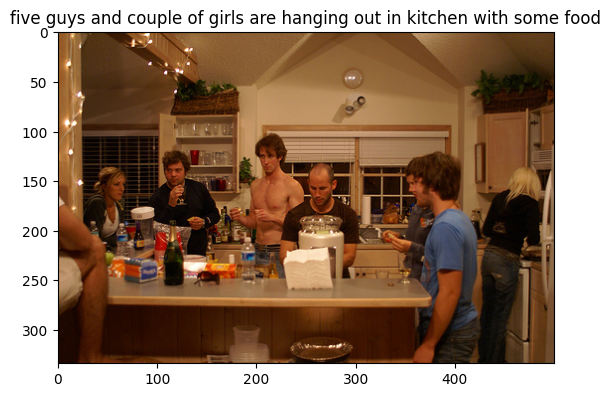

Caption: five guys and couple of girls are hanging out in kitchen with some food
Target: tensor([  2, 263, 318,   7, 164,  10,  92,  14, 321,  72,   4, 279,  11,  70,
        137,   3])


In [14]:
from torchvision import transforms
from torch.utils.data import Dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from collections import defaultdict

class Flicker30kData(Dataset):
    def __init__(self, dataset, split='train', vocab=None, img_size=224):
        """
        Initializes the Captioning dataset.
        
        Parameters:
        - dataset: Hugging Face Dataset object (train, validation, or test)
        - split: str, dataset split to use ('train', 'validation', or 'test')
        - vocab: Vocabulary object
        - img_size: int, image size to resize
        """
        self.dataset = dataset[split]
        self.vocab = vocab
        self.split = split
        self.transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomCrop(img_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

    def clean_caption(self, caption_list):
        """
        Cleans a list of captions by:
        - Lowercasing words
        - Removing punctuation
        - Removing words with non-alphabetic characters or length <= 1
        """
        table = str.maketrans('', '', string.punctuation)
        cleaned_captions = []
        for caption in caption_list:
            words = caption.lower().split()  # Tokenize and lowercase
            words = [w.translate(table) for w in words]  # Remove punctuation
            words = [re.sub(r'\W+', '', w) for w in words if len(w) > 1]
            cleaned_captions.append(' '.join(words))  # Rejoin words into cleaned caption
        return cleaned_captions[0]#' '.join(cleaned_captions)  # Concatenate all cleaned captions with a space


    def __getitem__(self, index):
        """Returns one data pair (image and processed caption)."""
        row = self.dataset[index]
        image = row['image']  # PIL Image object
        
        # Clean and process all captions
        raw_caption_list = row['caption']  # List of captions
        cleaned_caption = self.clean_caption(raw_caption_list)  # Clean and join captions
        
        # Tokenize and map words to vocab indices
        tokens = cleaned_caption.split()
        target = [self.vocab['<start>']]  # Add <start> token
        for token in tokens:
            if token in self.vocab:
                target.append(self.vocab[token])
            else:
                print(f"Unknown word: {token}")  # Debugging unknown word
                target.append(self.vocab['<unk>'])  # Default to <unk>
        target.append(self.vocab['<end>'])  # Add <end> token
        
        target = torch.Tensor(target).long()
        
        return image, target, cleaned_caption
       
    def __len__(self):
        """Returns the total number of samples in the dataset."""
        return len(self.dataset)

    def collate_fn(self, data):
        """Collates the samples into batches."""
        data.sort(key=lambda x: len(x[1]), reverse=True)  # Sort by caption length
        images, targets, captions = zip(*data)
        images = torch.stack([self.transform(image) for image in images], 0)
        
        lengths = [len(tar) for tar in targets]
        max_len = max(lengths)
        padded_targets = torch.zeros(len(captions), max_len).long()
        
        for i, tar in enumerate(targets):
            end = lengths[i]
            padded_targets[i, :end] = tar[:end]
        
        return images, padded_targets, torch.tensor(lengths).long()

# Create datasets for training and validation
train_dataset = Flicker30kData(dataset_flickr30k, split='train', vocab=vocab)
val_dataset = Flicker30kData(dataset_flickr30k, split='validation', vocab=vocab)

# To view a sample:
image, target, caption = train_dataset[0]

# Convert the PIL image to a tensor
transform = transforms.ToTensor()  # Convert image to [0, 1] tensor
image_tensor = transform(image)

# Now you can use permute to adjust the dimensions (C, H, W) -> (H, W, C)
plt.imshow(image_tensor.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
plt.title(caption)
plt.show()

print("Caption:", caption)
print("Target:", target)

In [15]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, 32, collate_fn=train_dataset.collate_fn)
valid_dataloader = DataLoader(val_dataset, 32, collate_fn=val_dataset.collate_fn)
#inspect(*next(iter(trn_dl)), names='images,targets,lengths')

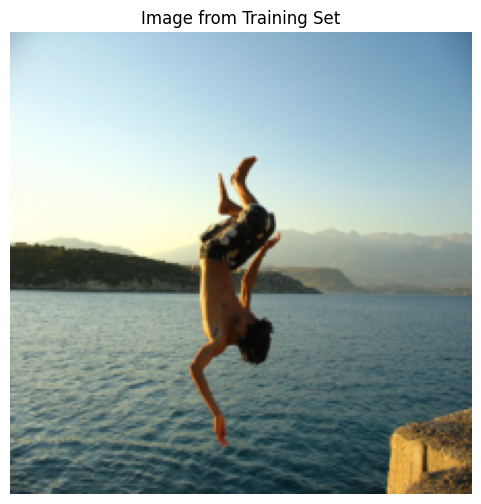

Raw Caption (cleaned and joined): tensor(37)
Processed Caption (indices): [2, 162, 3155, 213, 21, 1253, 9, 19, 5436, 121, 213, 185, 613, 716, 7, 9, 791, 37, 69, 294, 10, 43, 340, 283, 213, 9982, 2307, 619, 1015, 7, 7030, 98, 975, 4, 5, 397, 3]


In [16]:
import matplotlib.pyplot as plt

# Fetch one batch from the training DataLoader
for batch in train_dataloader:
    images, targets, raw_captions = batch
    break  # Only take the first batch

# Select the first instance from the batch
image = images[0]  # PIL Image
target = targets[0]  # Processed caption as tensor
raw_caption = raw_captions[0]  # Original cleaned caption

# Convert the image tensor to a format suitable for visualization
def tensor_to_image(image_tensor):
    image_tensor = image_tensor.permute(1, 2, 0)  # Convert to (H, W, C)
    image_tensor = image_tensor * torch.tensor([0.229, 0.224, 0.225])  # Reapply std
    image_tensor = image_tensor + torch.tensor([0.485, 0.456, 0.406])  # Reapply mean
    image_tensor = image_tensor.clamp(0, 1)  # Ensure values are in [0, 1]
    return image_tensor.numpy()

# Visualize the image and print its caption
plt.figure(figsize=(6, 6))
plt.imshow(tensor_to_image(image))
plt.axis("off")
plt.title("Image from Training Set")
plt.show()

# Print the raw and processed captions
print("Raw Caption (cleaned and joined):", raw_caption)
print("Processed Caption (indices):", target.tolist())


# Resnet architecture:

In [17]:
'''
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models
import torch.nn as nn
from torchsummary import summary

class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1] # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features
encoder = EncoderCNN(256).to(device)

print(summary(encoder,torch.zeros(32,3,224,224).to(device)))
'''

'\nfrom torch.nn.utils.rnn import pack_padded_sequence\nfrom torchvision import models\nimport torch.nn as nn\nfrom torchsummary import summary\n\nclass EncoderCNN(nn.Module):\n    def __init__(self, embed_size):\n        """Load the pretrained ResNet-152 and replace top fc layer."""\n        super(EncoderCNN, self).__init__()\n        resnet = models.resnet152(pretrained=True)\n        modules = list(resnet.children())[:-1] # delete the last fc layer.\n        self.resnet = nn.Sequential(*modules)\n        self.linear = nn.Linear(resnet.fc.in_features, embed_size)\n        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)\n        \n    def forward(self, images):\n        """Extract feature vectors from input images."""\n        with torch.no_grad():\n            features = self.resnet(images)\n        features = features.reshape(features.size(0), -1)\n        features = self.bn(self.linear(features))\n        return features\nencoder = EncoderCNN(256).to(device)\n\nprint(summary(en

# VGG16 Architecture

In [18]:
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.utils.rnn import pack_padded_sequence

class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained VGG16 and modify it for feature extraction."""
        super(EncoderCNN, self).__init__()
        vgg = models.vgg16(pretrained=True)
        self.features = vgg.features  # Extract convolutional layers
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))  # Ensure consistent size
        self.linear = nn.Linear(512 * 7 * 7, embed_size)  # Map to embed_size
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.features(images)  # Convolutional feature maps
            features = self.avgpool(features)  # Pooling to consistent size
        features = features.view(features.size(0), -1)  # Flatten
        features = self.bn(self.linear(features))  # Map to embed_size
        return features

#encoder = EncoderCNN(256).to(device)

In [29]:
class DecoderLSTM(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=100, dropout_prob=0.5):
        """Set the hyper-parameters and build the layers."""
        super(DecoderLSTM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        self.dropout = nn.Dropout(dropout_prob)  # Dropout layer with specified probability

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        #print(f"Features: {features}, Captions: {captions}, Lengths: {lengths}")  # Debugging
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1).detach(), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True) 
        outputs, _ = self.lstm(packed)
        outputs = self.dropout(outputs[0])
        outputs = self.linear(outputs)
        return outputs
    def predict(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seq_length):
            #print(f"inputs {inputs}, states: {states}")  # Debug prediction
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)
            #print(f"hiddens {hiddens}, states: {states}")  # Debug prediction
            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            #print(f"outputs {outputs}")  # Debug prediction

            _, predicted = outputs.max(1) # predicted: (batch_size)
            #print(f"Step {i}, Predicted: {predicted}")  # Debug prediction
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)#.detach() # inputs: (batch_size, embed_size)
            #print(f"Inputs: {inputs}")
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)

        sampled_ids = torch.stack(sampled_ids, 1) # sampled_ids: (batch_size, max_seq_length)
        #print('Predict sampleID', sampled_ids)
        # convert predicted tokens to strings
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()
            sampled_caption = []
            for word_id in sampled_id:
                #print(word_id)
                word = vocab[int(word_id)]
                sampled_caption.append(word)
                if word == '<end>': #or '.' in word:
                    break
            sentence = ' '.join(sampled_caption)
            sentences.append(sentence)
        return sentences
    

In [30]:
def train_batch(data, encoder, decoder, optimizer, criterion):
    encoder.train()
    decoder.train()
    images, captions, lengths = data
    images = images.to(device)
    captions = captions.to(device)
    #print(captions)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]
    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)
    decoder.zero_grad()
    encoder.zero_grad()
    loss.backward()
    optimizer.step()

    ## Assuming 'outputs' is the predicted sequence and 'targets' is the ground truth sequence
    #_, predicted = torch.max(outputs, dim=-1)  # Get the predicted words
    #correct = (predicted == targets).sum().item()  # Count correct predictions
    #accuracy = correct / targets.size(0)  # Calculate accuracy per batch
    

    return loss#, accuracy

In [31]:
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    encoder.eval()
    decoder.eval()
    images, captions, lengths = data
    images = images.to(device)
    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]
    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)
    return loss

In [40]:
#from report import Report
from torch_snippets.torch_loader import Report

encoder = EncoderCNN(256).to(device)
decoder = DecoderLSTM(256, 512, len(vocab), 1).to(device)

criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
#optimizer = torch.optim.AdamW(params, lr=1e-3)
optimizer = torch.optim.AdamW(params, lr=1e-3)
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=2, gamma=0.8)
n_epochs = 18
log = Report(n_epochs)

In [23]:
for i, data in enumerate(train_dataloader):
    if i > 5:
        break
    print(data[0].shape, data[1].shape, data[2].shape)

torch.Size([32, 3, 224, 224]) torch.Size([32, 37]) torch.Size([32])
torch.Size([32, 3, 224, 224]) torch.Size([32, 33]) torch.Size([32])
torch.Size([32, 3, 224, 224]) torch.Size([32, 29]) torch.Size([32])
torch.Size([32, 3, 224, 224]) torch.Size([32, 31]) torch.Size([32])
torch.Size([32, 3, 224, 224]) torch.Size([32, 38]) torch.Size([32])
torch.Size([32, 3, 224, 224]) torch.Size([32, 35]) torch.Size([32])


In [24]:
#encoder.load_state_dict(torch.load("./models/encoder_best_model_vgg16.pt"))
#decoder.load_state_dict(torch.load("./models/decoder_best_model_lstm.pt"))

#encoder.load_state_dict(torch.load("./models/encoder_best_model_vgg16_second_t.pt"))
#decoder.load_state_dict(torch.load("./models/decoder_best_model_lstm_second_t.pt"))

In [43]:
# Loss and accuracy tracking lists
train_losses = []
val_losses = []
#train_accuracies = []
#val_accuracies = []

best_val_loss = float("inf")

# Training loop
for epoch in range(50):
    #if epoch == 5:
    #    optimizer = torch.optim.AdamW(params, lr=1e-5)
    #if epoch == 8:
        #optimizer = torch.optim.AdamW(params, lr=1e-5)

    # Training phase
    train_loss_epoch = 0
    train_accuracy_epoch = 0
    N = len(train_dataloader)
    for i, data in enumerate(train_dataloader):
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion)
        train_loss_epoch += trn_loss.item()
        #train_accuracy_epoch += trn_accuracy
        pos = epoch + (1 + i) / N
        log.record(pos=pos, trn_loss=trn_loss, end='\r')
        #print(f"Epoch: {epoch + 1}, Step: {i + 1}/{len(train_dataloader)}, Pos: {pos:.4f}, Train Loss: {trn_loss:.6f}")
    print("finished training epoch: ", epoch)
    print("train_loss_epoch: ", train_loss_epoch)
    # Validation phase
    val_loss_epoch = 0
    #val_accuracy_epoch = 0
    N = len(valid_dataloader)
    for i, data in enumerate(valid_dataloader):
        val_loss = validate_batch(data, encoder, decoder, criterion)
        val_loss_epoch += val_loss.item()
        #val_accuracy_epoch += val_accuracy
        pos = epoch + (1 + i) / N
        log.record(pos=pos, val_loss=val_loss, end='\r')
    
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss
        torch.save(encoder.state_dict(), "./models/encoder_best_model_vgg16_v4.pt")
        torch.save(decoder.state_dict(), "./models/decoder_best_model_lstm_v4.pt")
        print("Saved Best Model!")
    
    if val_loss_epoch < 300:
        break
    # Average losses and accuracies
    avg_train_loss = train_loss_epoch / N
    avg_train_accuracy = train_accuracy_epoch / N
    avg_val_loss = val_loss_epoch / N
    #avg_val_accuracy = val_accuracy_epoch / N
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    #train_accuracies.append(avg_train_accuracy)
    #val_accuracies.append(avg_val_accuracy)
    
    log.report_avgs(epoch + 1)
    scheduler.step()

# Plot loss decay
import matplotlib.pyplot as plt

plt.plot(range(1, n_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Decay over Epochs')
plt.legend()
plt.show()

# Plot accuracy
#plt.plot(range(1, n_epochs+1), train_accuracies, label='Training Accuracy')
#plt.plot(range(1, n_epochs+1), val_accuracies, label='Validation Accuracy')
##plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.title('Accuracy over Epochs')
#plt.legend()
#plt.show()

EPOCH: 1.000  trn_loss: 1.678  (648.05s - 11016.88s remaining)finished training epoch:  0
train_loss_epoch:  1768.0840018987656
EPOCH: 1.000  val_loss: 3.902  (715.73s - 12167.41s remaining)))Saved Best Model!
EPOCH: 1.000  val_loss: 4.107  trn_loss: 2.849  (716.17s - 12174.96s remaining)
EPOCH: 2.000  trn_loss: 1.493  (999.98s - 7999.80s remaining)finished training epoch:  1
train_loss_epoch:  1711.557426571846
EPOCH: 1.359  val_loss: 4.245  (1024.77s - 12548.65s remaining)

KeyboardInterrupt: 

In [41]:
encoder.load_state_dict(torch.load("./models/encoder_best_model_vgg16_v3_epoch14.pt"))
decoder.load_state_dict(torch.load("./models/decoder_best_model_lstm_v3_epoch14.pt"))

#torch.save(encoder.state_dict(), "./models/encoder_best_model_vgg16_v3_epoch18.pt")
#torch.save(decoder.state_dict(), "./models/decoder_best_model_lstm_v3_epoch18.pt")
        

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_17856\1765880461.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("./models/encoder_bes

<All keys matched successfully>

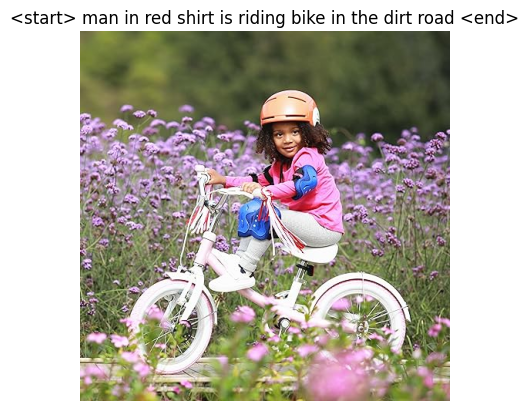

Generated Caption: <start> man in red shirt is riding bike in the dirt road <end>


In [42]:
def preprocess_image(image, transform=None):
    """
    Preprocess the input image.
    
    Args:
        image (PIL.Image.Image): Input image.
        transform (callable, optional): Transformation to apply.

    Returns:
        tuple: Original image and transformed tensor.
    """
    image = image.resize([224, 224], Image.LANCZOS)
    if transform is not None:
        tfm_image = transform(image)[None]
    return image, tfm_image


@torch.no_grad()
def predict_from_image(image, encoder, decoder, device):
    """
    Predict a caption from a given image.
    
    Args:
        image (PIL.Image.Image): Input image.
        encoder (torch.nn.Module): Encoder model.
        decoder (torch.nn.Module): Decoder model.
        device (torch.device): Torch device.

    Returns:
        str: Generated caption.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    org_image, tfm_image = preprocess_image(image, transform)
    image_tensor = tfm_image.to(device)

    encoder.eval()
    decoder.eval()
    
    feature = encoder(image_tensor)
    #print(feature)
    sentence = decoder.predict(feature)[0]

    #show(org_image, title=sentence)

    #show(org_image, title=sentence)
    # Display the image with the generated caption as the title
    formatted_caption = ""
    formatted_caption = "\n".join(sentence.strip() for sentence in sentence.split('.') if sentence.strip())
    plt.imshow(image)
    plt.title(formatted_caption)
    plt.axis('off')  # To hide axis if you don't need them
    plt.show()
    return sentence


# Example Usage
#from PIL import Image

#for i in range(10):
#    image = dataset_flickr30k['test'][i]['image']
#    caption = predict_from_image(image, encoder, decoder, device)
#    print("Generated Caption:", caption)


# Load a single PIL image
#image = dataset_flickr30k['test'][6]['image'].convert("RGB")
image = Image.open("./test_images/media._SL480_.jpeg").convert("RGB")
# Predict directly
caption = predict_from_image(image, encoder, decoder, device)
print("Generated Caption:", caption)


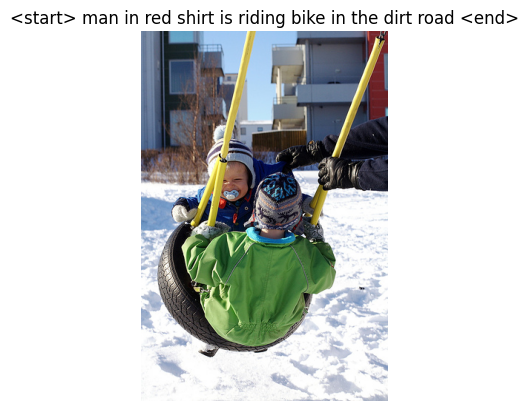

BLEU score: 0.0364


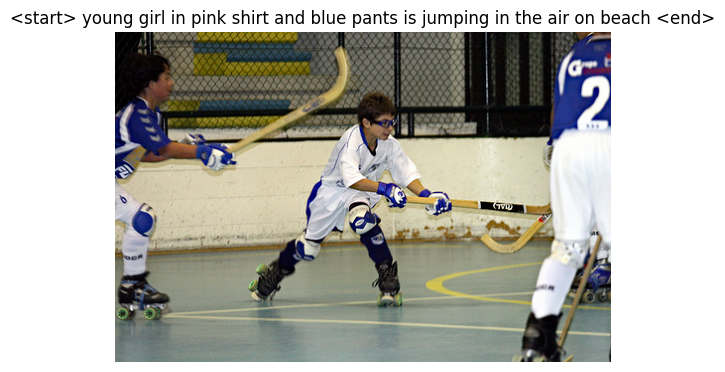

BLEU score: 0.0163


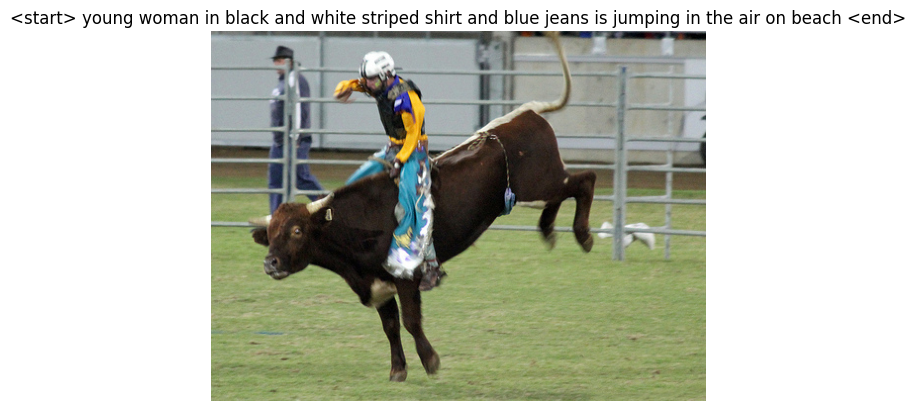

BLEU score: 0.0379


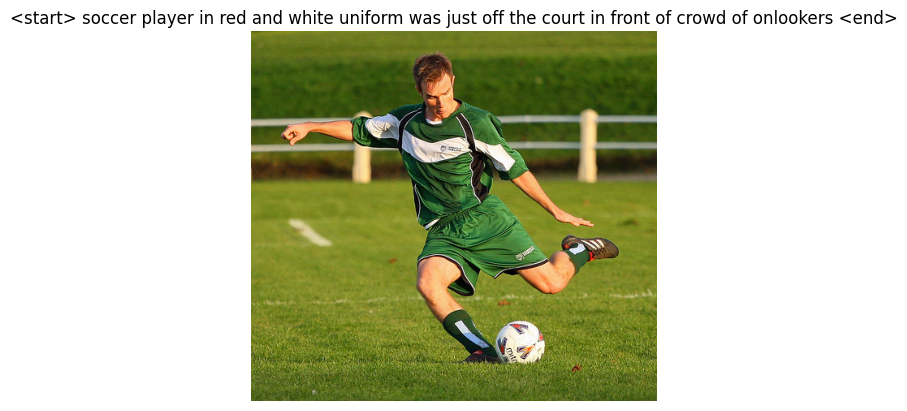

BLEU score: 0.0256


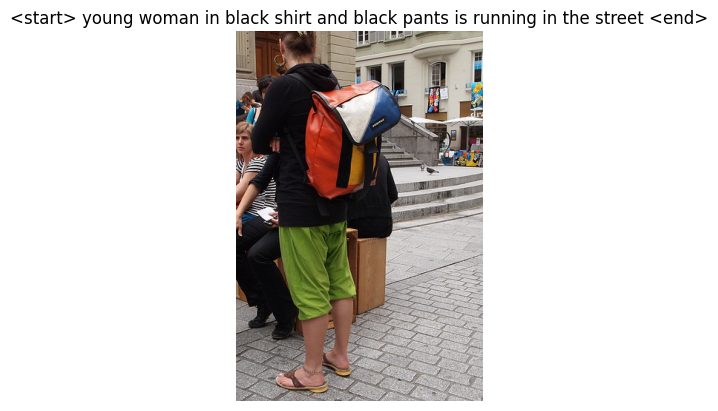

BLEU score: 0.0207


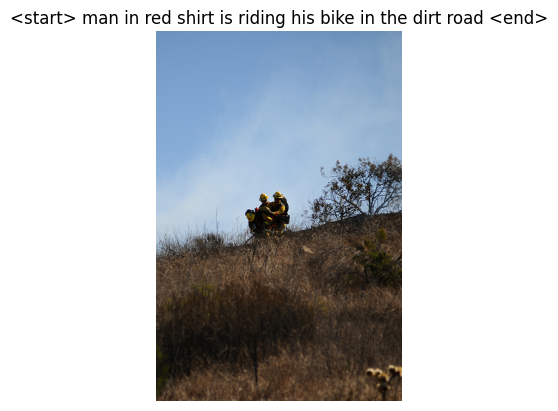

BLEU score: 0.0302


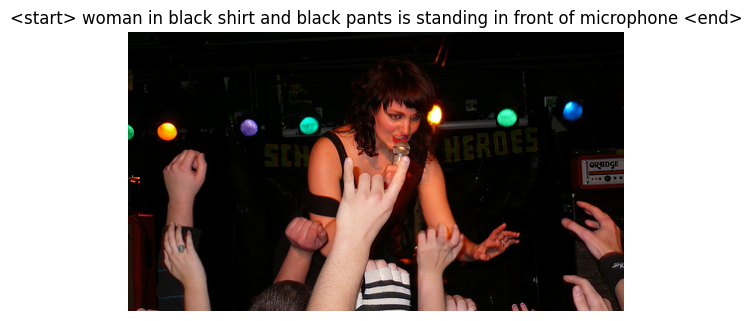

BLEU score: 0.0681


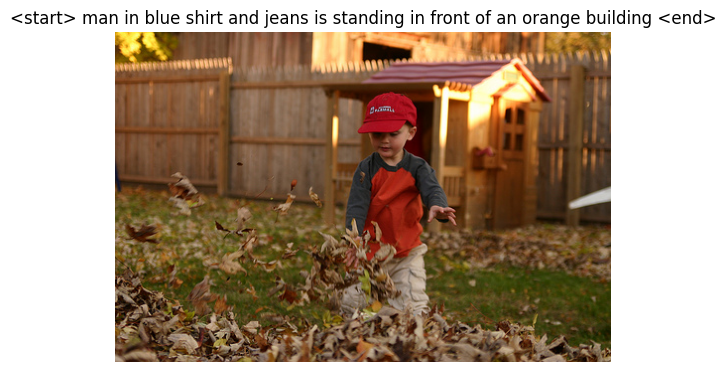

BLEU score: 0.0437


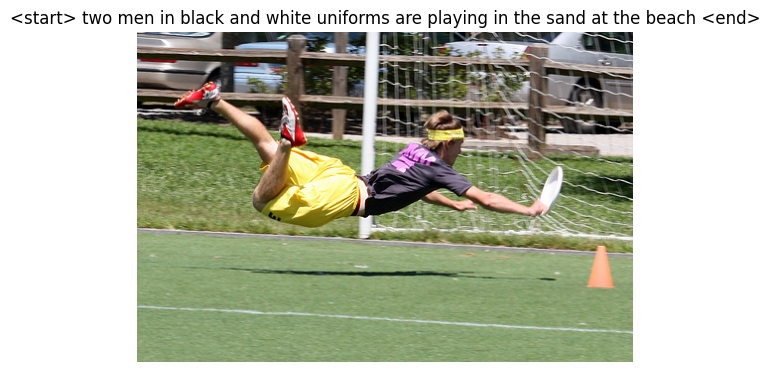

BLEU score: 0.0285


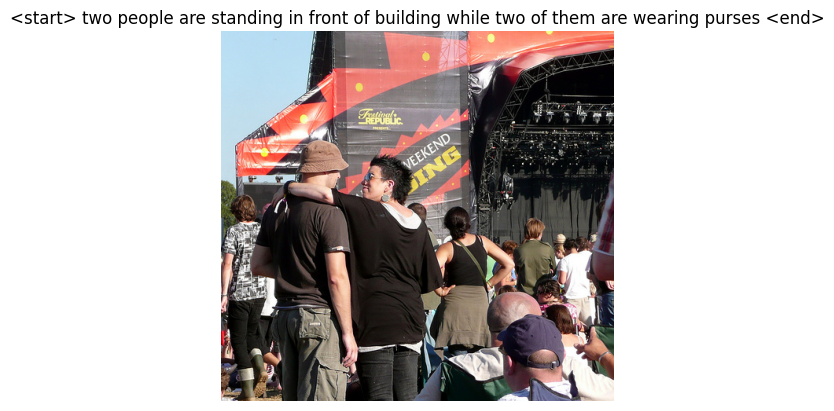

BLEU score: 0.0144


In [35]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

blue_list = []
smoothie = SmoothingFunction().method1  # Optional smoothing
for i in range(10):
    image = dataset_flickr30k['test'][i]['image']
    references = [caption.split() for caption in dataset_flickr30k['test'][i]['caption']]  # Tokenized reference captions
    candidate = predict_from_image(image, encoder, decoder, device).split()  # Tokenized generated caption
    bleu_score = sentence_bleu(references, candidate, smoothing_function=smoothie)
    blue_list.append(bleu_score)
    #print("Generated Caption:", caption)
    print(f"BLEU score: {bleu_score:.4f}")